<a href="https://colab.research.google.com/github/kosowskie/175IC-machine-learning/blob/main/Zad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import statsmodels.api as sm
import sys

In [5]:
np.random.seed(42)

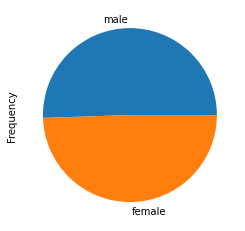

In [6]:
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()
df = df_raw.copy()
df.drop_duplicates()
df.sex.value_counts()
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist', bins=30)
px.histogram(df, x='charges', width=700, height=400, nbins=50, facet_col='smoker', facet_row='sex')

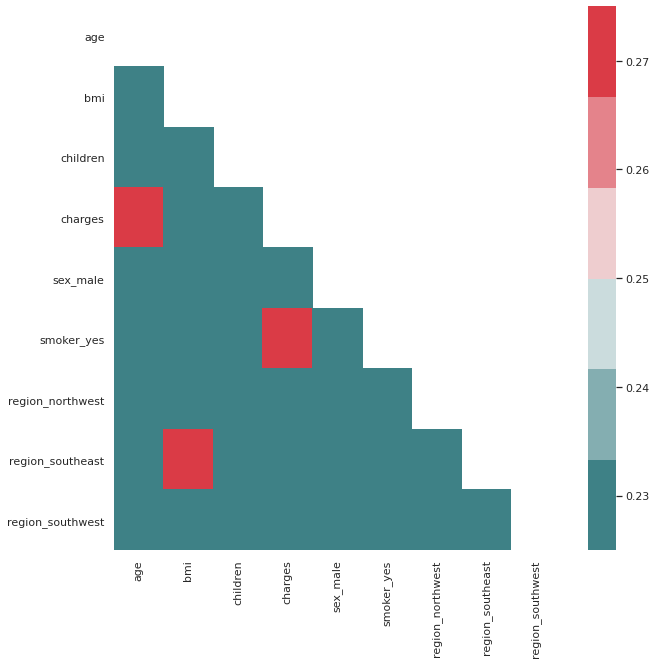

In [8]:
df_dummies = pd.get_dummies(df,drop_first=True)
corr = df_dummies.corr()

sns.set(style='white')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr,mask=mask, cmap=cmap,vmax=0.25,vmin=0.25)

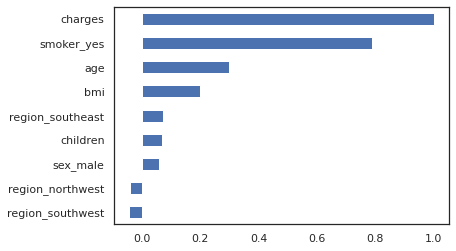

In [9]:
df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

In [33]:
output = df_dummies['charges']
input = df_dummies.drop(columns='charges')


x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(input,output,test_size=0.2)

regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train,y_train)
r2=regressor.score(x_test,y_test)
print(F'Wynik regresji: {regressor.score(x_test,y_test):.4f}')

Wynik regresji: 0.7674


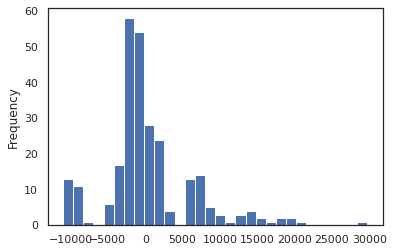

In [23]:
y_pred = regressor.predict(x_test)
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true':y_true,'y_pred':y_pred})
predictions['error'] = predictions.y_true - predictions.y_pred
predictions.error.plot(kind='hist',bins=30)

In [34]:
srednia = sklearn.metrics.mean_absolute_error(y_true,y_pred)
print(F'średnia wynosi: {srednia:.2f}')

średnia wynosi: 4527.77


In [26]:
x_train_ols = sm.add_constant(x_train.values)
ols = sm.OLS(endog=y_train,exog=x_train_ols).fit()
przewidywania = ['const'] + list(x_train.columns)

print(ols.summary(xname= przewidywania))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     400.9
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          2.15e-314
Time:                        17:16:25   Log-Likelihood:                -10833.
No. Observations:                1070   AIC:                         2.168e+04
Df Residuals:                    1061   BIC:                         2.173e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.202e+04   1090.155  

In [35]:

df_without_cols = df_dummies.drop(columns=['children','sex_male','region_northwest','region_southeast','region_southeast'])
df_without_cols.head()

output = df_without_cols['charges']
input = df_without_cols.drop(columns='charges')
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(input,output,test_size=0.2)
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train,y_train)
print(F'Wynik ponownej regresji : {regressor.score(x_test,y_test)}')
y_pred = regressor.predict(x_test)
y_true = y_test.copy()
print(F'Średnia ponowna:  {sklearn.metrics.mean_absolute_error(y_true,y_pred)}')
raw_size = sys.getsizeof(df_dummies)
cols_size = sys.getsizeof(df_without_cols)
print(F'Różnica po usunięciu zbędnych danych wynosi: {100-(cols_size/raw_size*100):.4f} procent')
print(F'Różnica regresji: {(r2-regressor.score(x_test,y_test)):.4f}')
print(F'Różnica średniej: {(srednia-sklearn.metrics.mean_absolute_error(y_true,y_pred)):.4f}')

Wynik ponownej regresji : 0.7495551893061556
Średnia ponowna:  4200.1675897534815
Różnica po usunięciu zbędnych danych wynosi: 29.6387 procent
Różnica regresji: 0.0178
Różnica średniej: 327.5984
